In [2]:
from music21 import *


In [2]:
startType = '2048th'
try:
    while True:
        print(startType, end=", ")
        startType = duration.nextLargerType(startType)
except duration.DurationException:
    pass

2048th, 1024th, 512th, 256th, 128th, 64th, 32nd, 16th, eighth, quarter, half, whole, breve, longa, maxima, duplex-maxima, 

In [3]:
for dots in range(12):
    print(dots, duration.Duration(type='quarter', dots=dots))

0 <music21.duration.Duration 1.0>
1 <music21.duration.Duration 1.5>
2 <music21.duration.Duration 1.75>
3 <music21.duration.Duration 1.875>
4 <music21.duration.Duration 1.9375>
5 <music21.duration.Duration 1.96875>
6 <music21.duration.Duration 1.984375>
7 <music21.duration.Duration 1.9921875>
8 <music21.duration.Duration 1.99609375>
9 <music21.duration.Duration 1.998046875>
10 <music21.duration.Duration 1.9990234375>
11 <music21.duration.Duration 1.99951171875>


In [10]:
d = duration.Duration(0.3333333333333)
print(d.quarterLength)
print(float(d.quarterLength))
print(d.fullName)
print((d.type, d.dots))
print(d.tuplets)

fiveInFour = duration.Tuplet(5, 4)
print(fiveInFour)
print(fiveInFour.tupletMultiplier())
print(fiveInFour.setDurationType('eighth'))
print(fiveInFour.totalTupletLength())
fiveInFour.setDurationType('quarter', dots=1)
print(fiveInFour.totalTupletLength())



1/3
0.3333333333333333
Eighth Triplet (1/3 QL)
('eighth', 0)
(<music21.duration.Tuplet 3/2/eighth>,)
<music21.duration.Tuplet 5/4>
4/5
None
2.0
6.0


In [11]:
oddTuplet = duration.Tuplet(11, 1)
oddTuplet.durationActual = '16th'
oddTuplet.durationNormal = duration.Duration('quarter', dots=2)
oddTuplet.totalTupletLength()

1.75

True
True
('number', None)


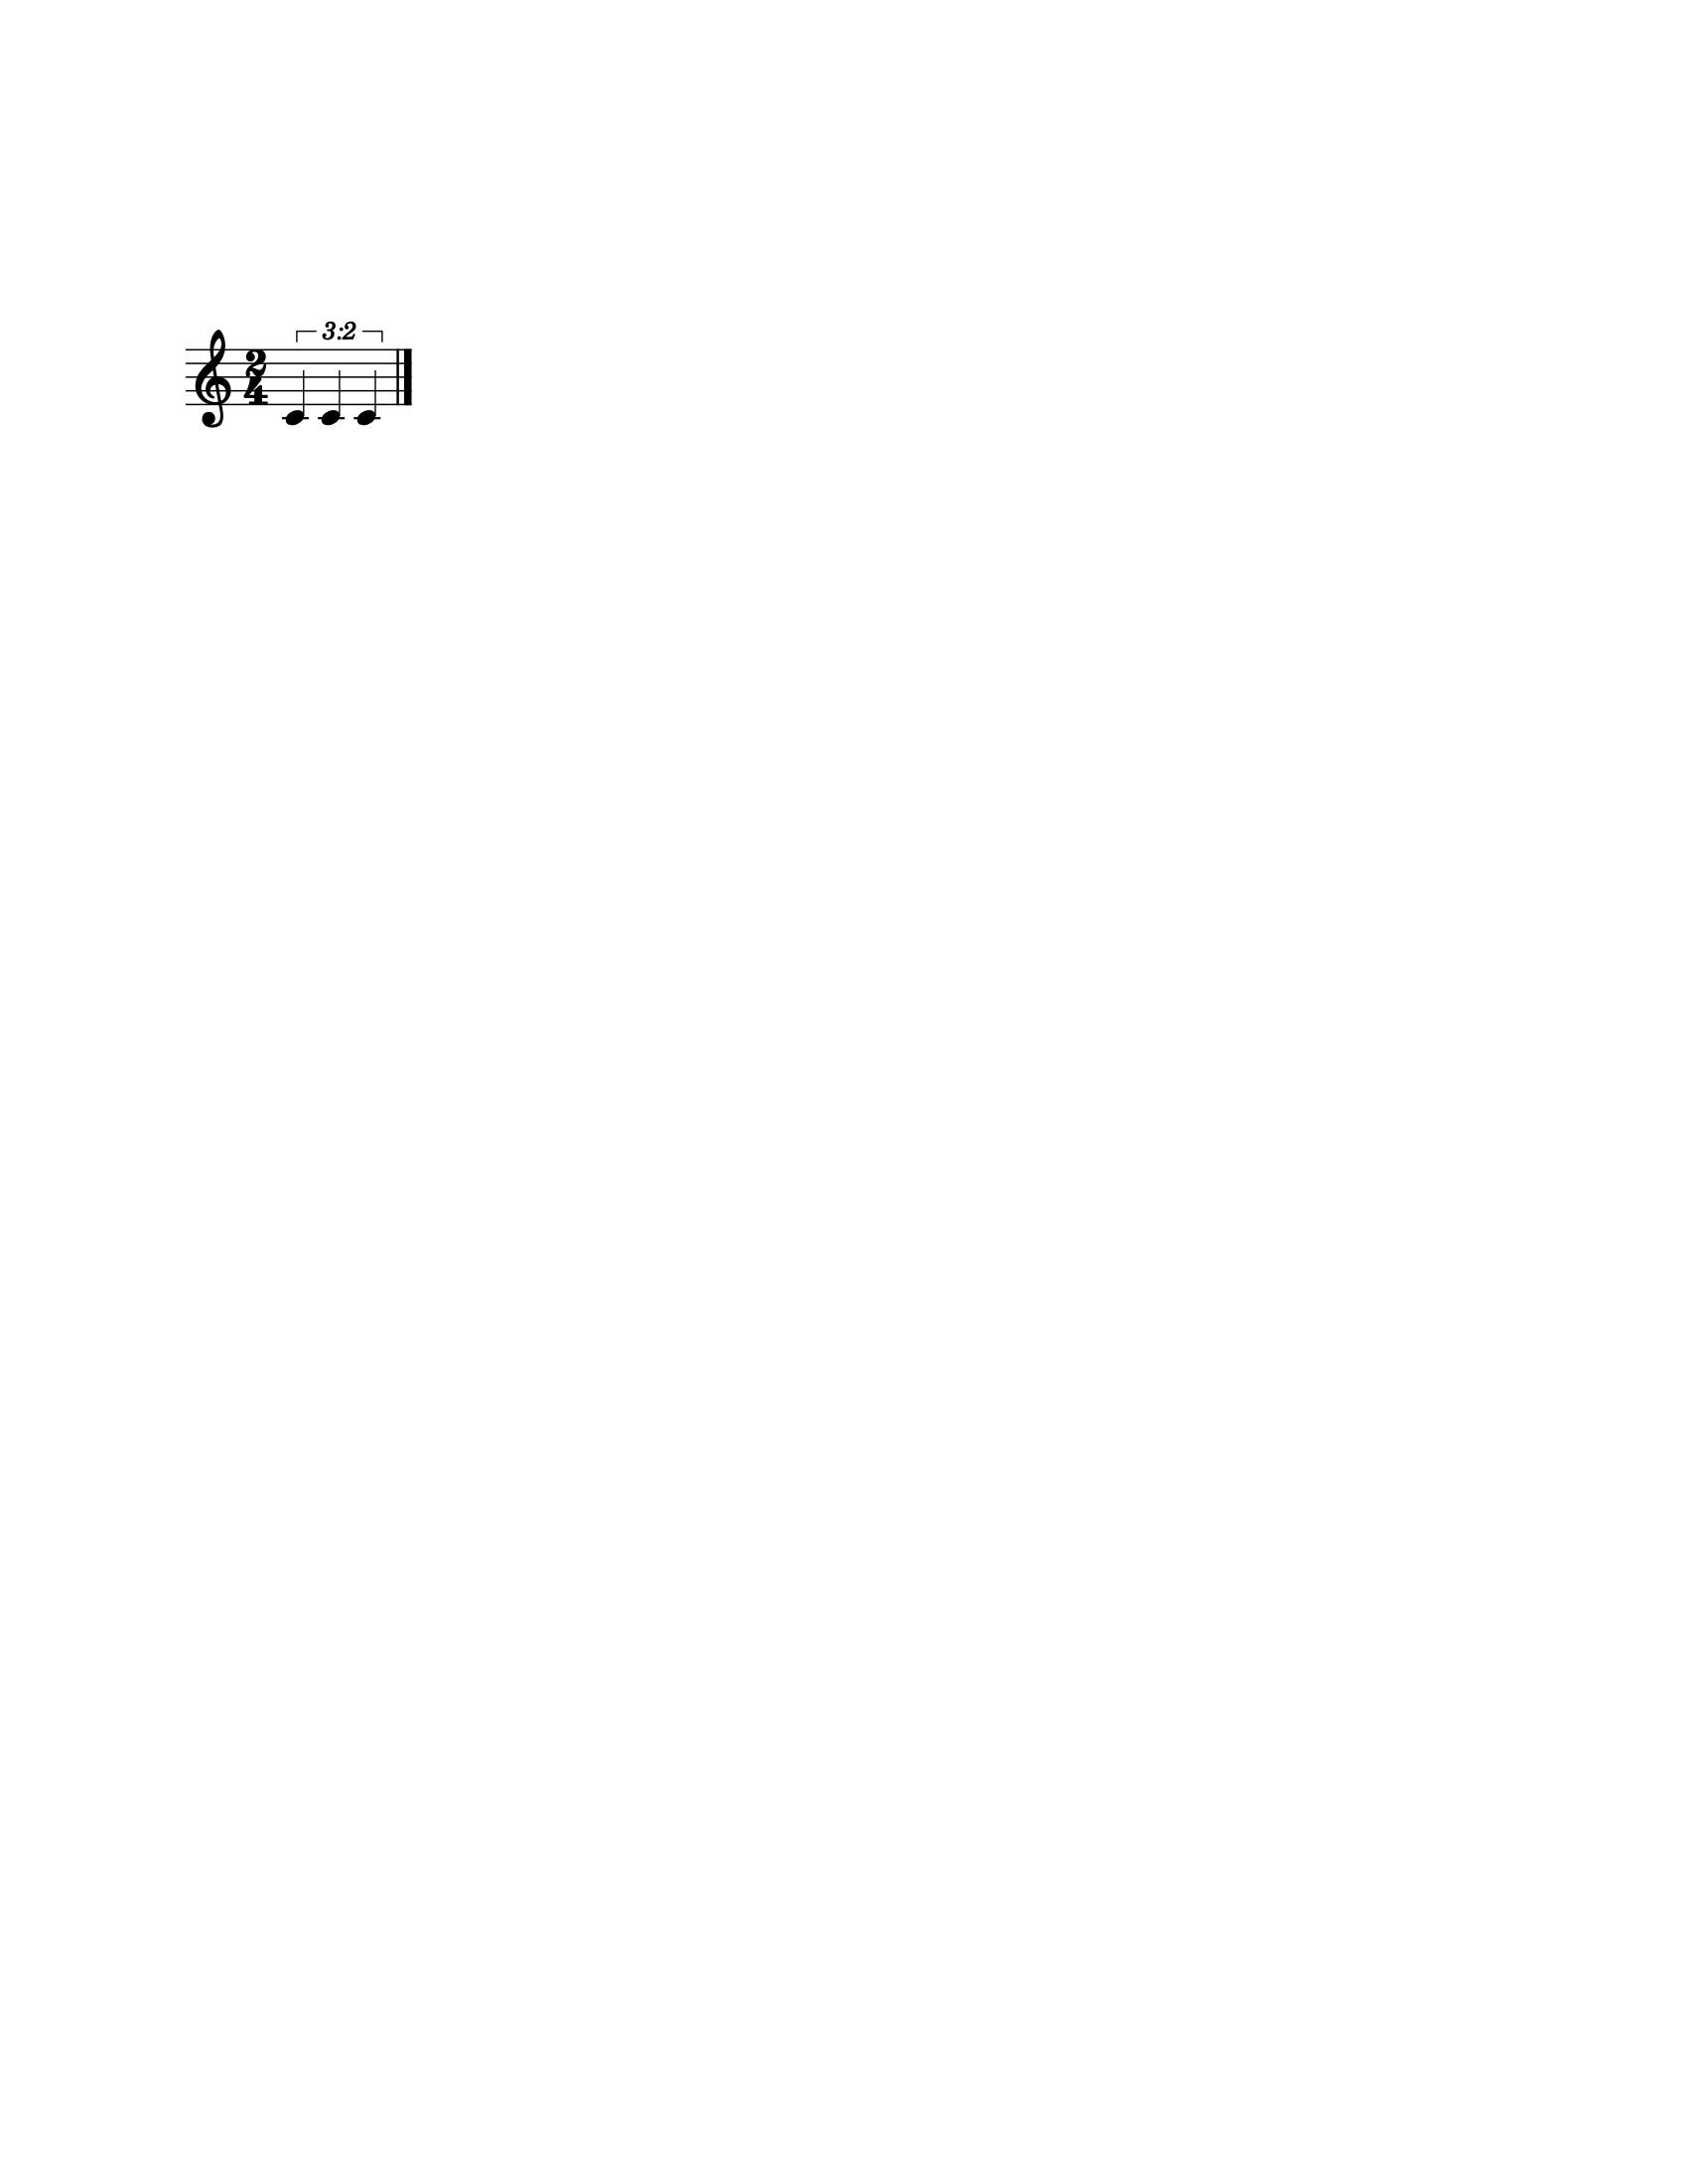

In [14]:
trip = duration.Tuplet(3, 2)
print(trip.type is None)
print(trip.bracket)
print((trip.tupletActualShow, trip.tupletNormalShow))
n = note.Note()
n.duration = duration.Duration(2.0/3.0)
n.duration.tuplets[0].tupletNormalShow = 'number'
s = stream.Stream()
s.repeatAppend(n, 3)
s.insert(0, meter.TimeSignature('2/4'))
s.show()


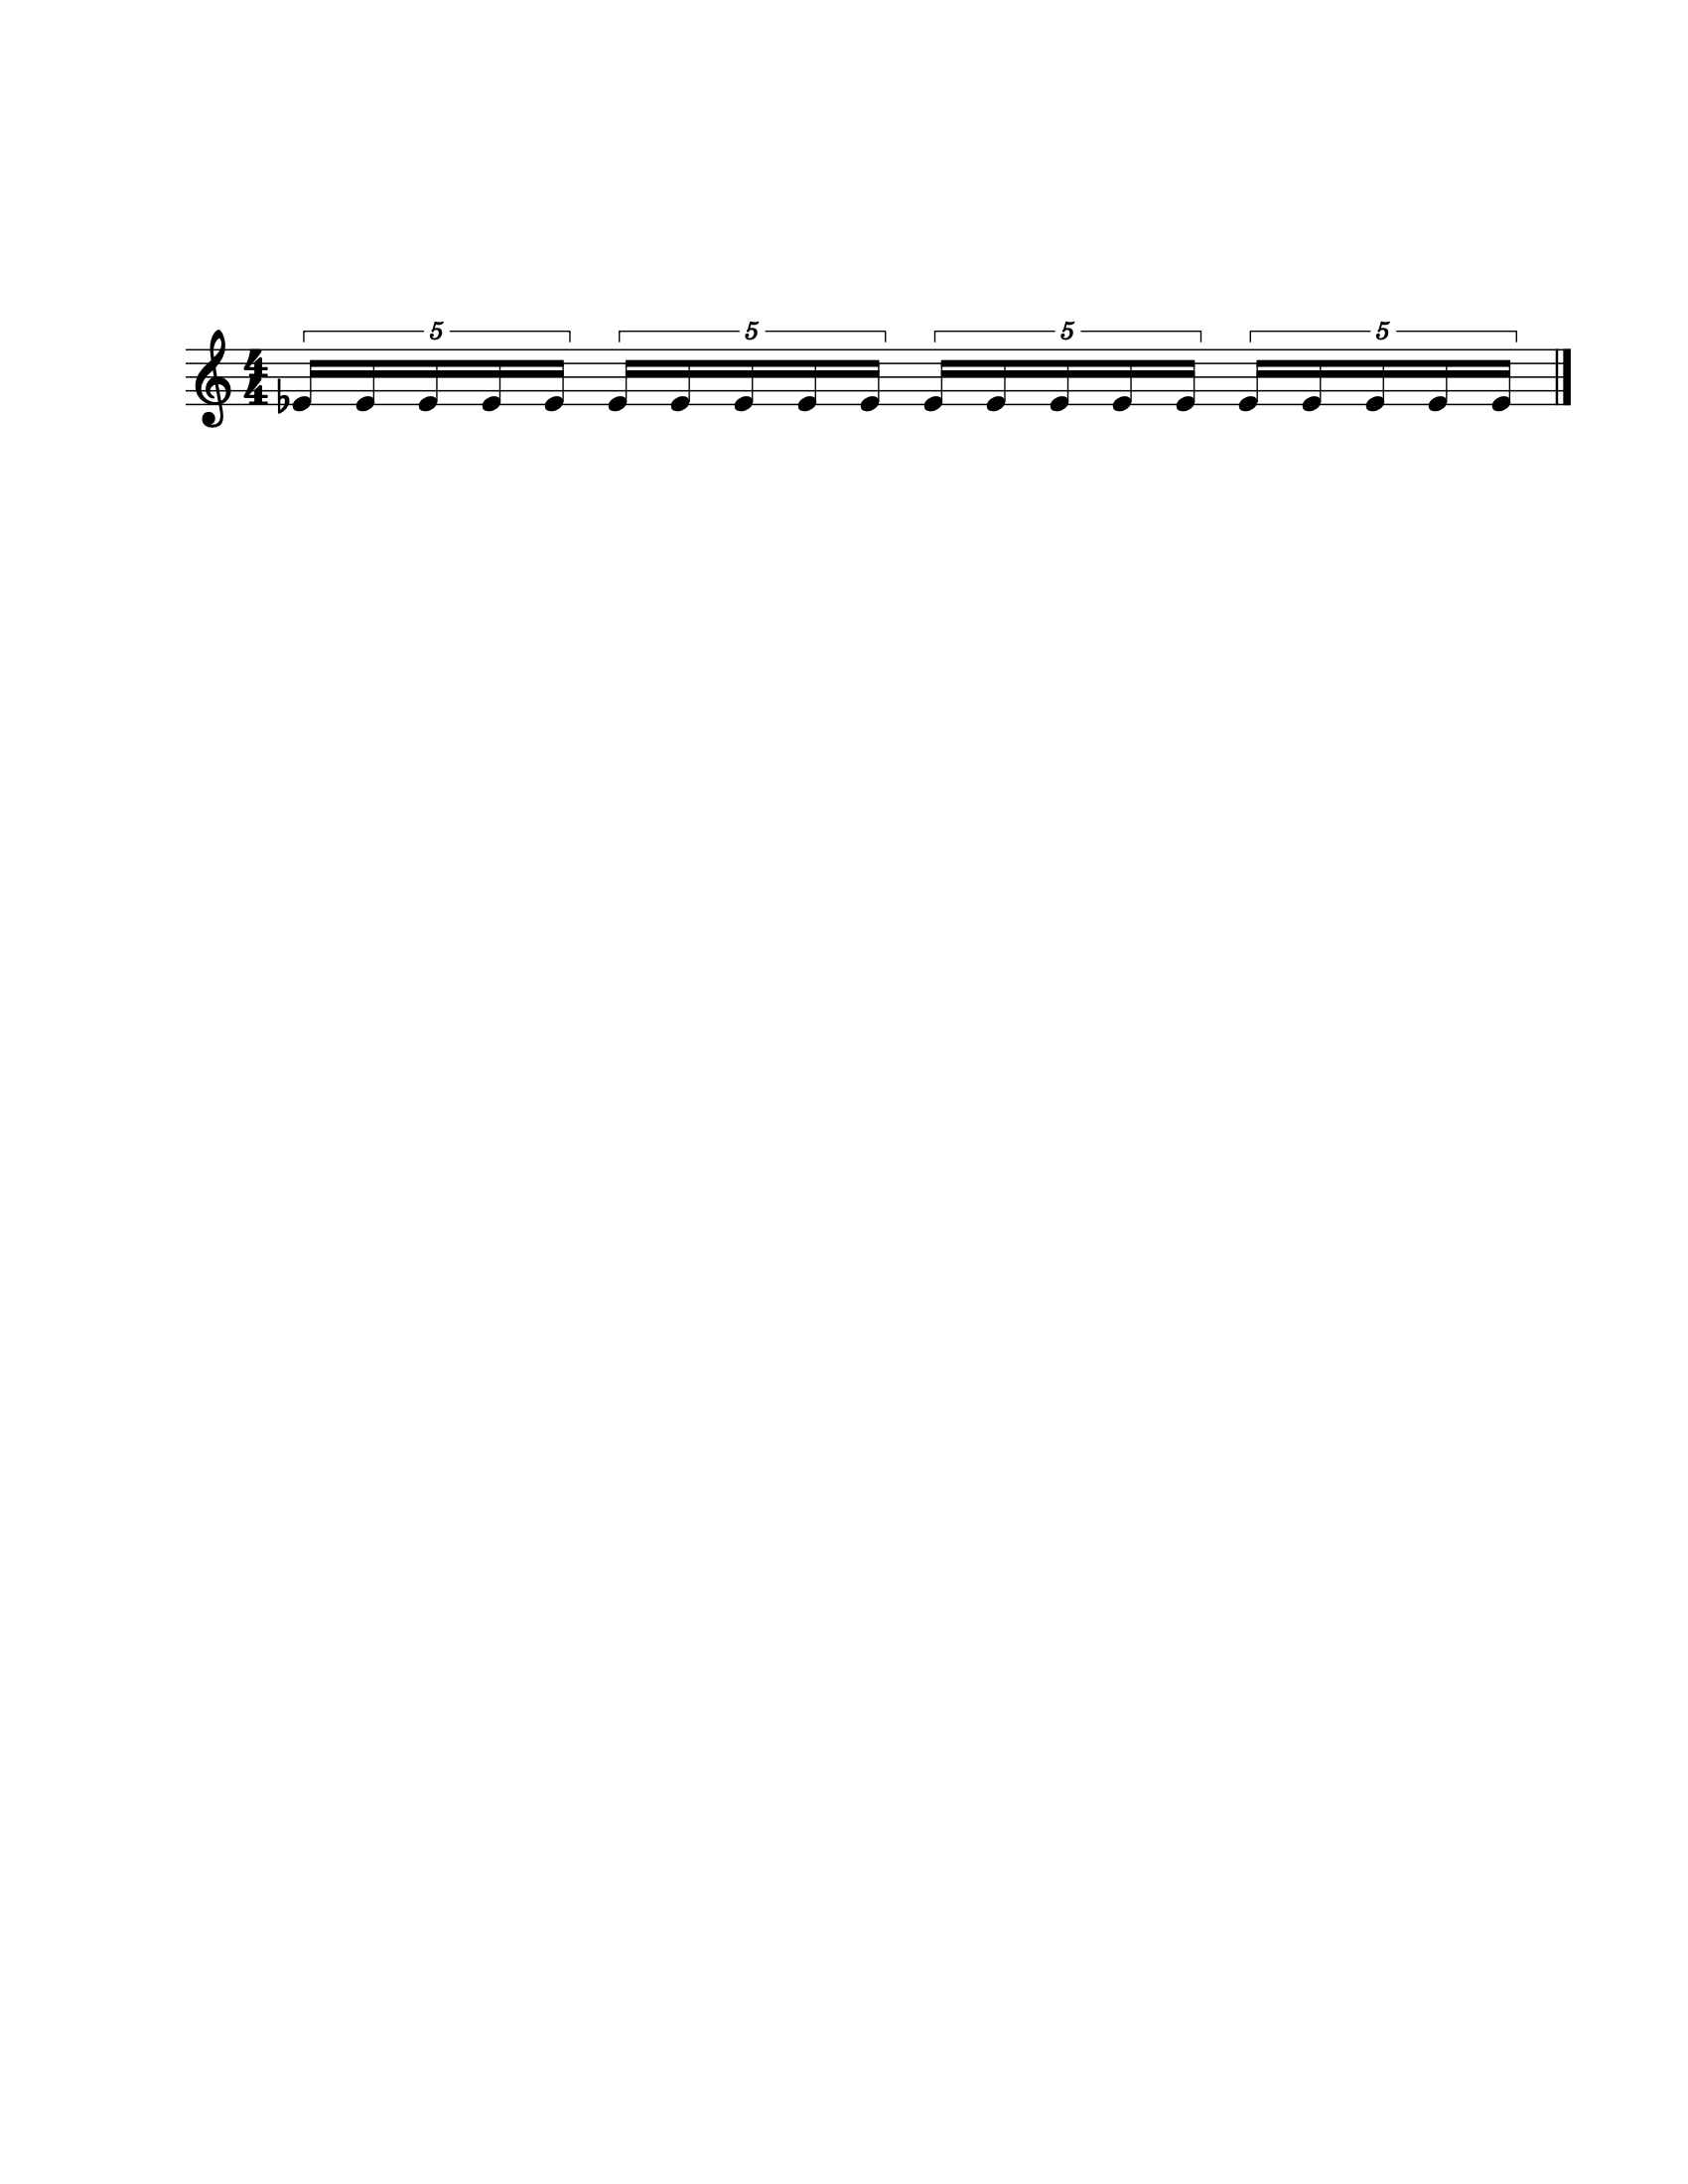

In [15]:
t = duration.Tuplet(5, 4)
t.setDurationType('16th')
d = duration.Duration('16th')
d.appendTuplet(t)
n = note.Note('E-4')
n.duration = d
s = stream.Stream()
s.repeatAppend(n, 20)
s.show()

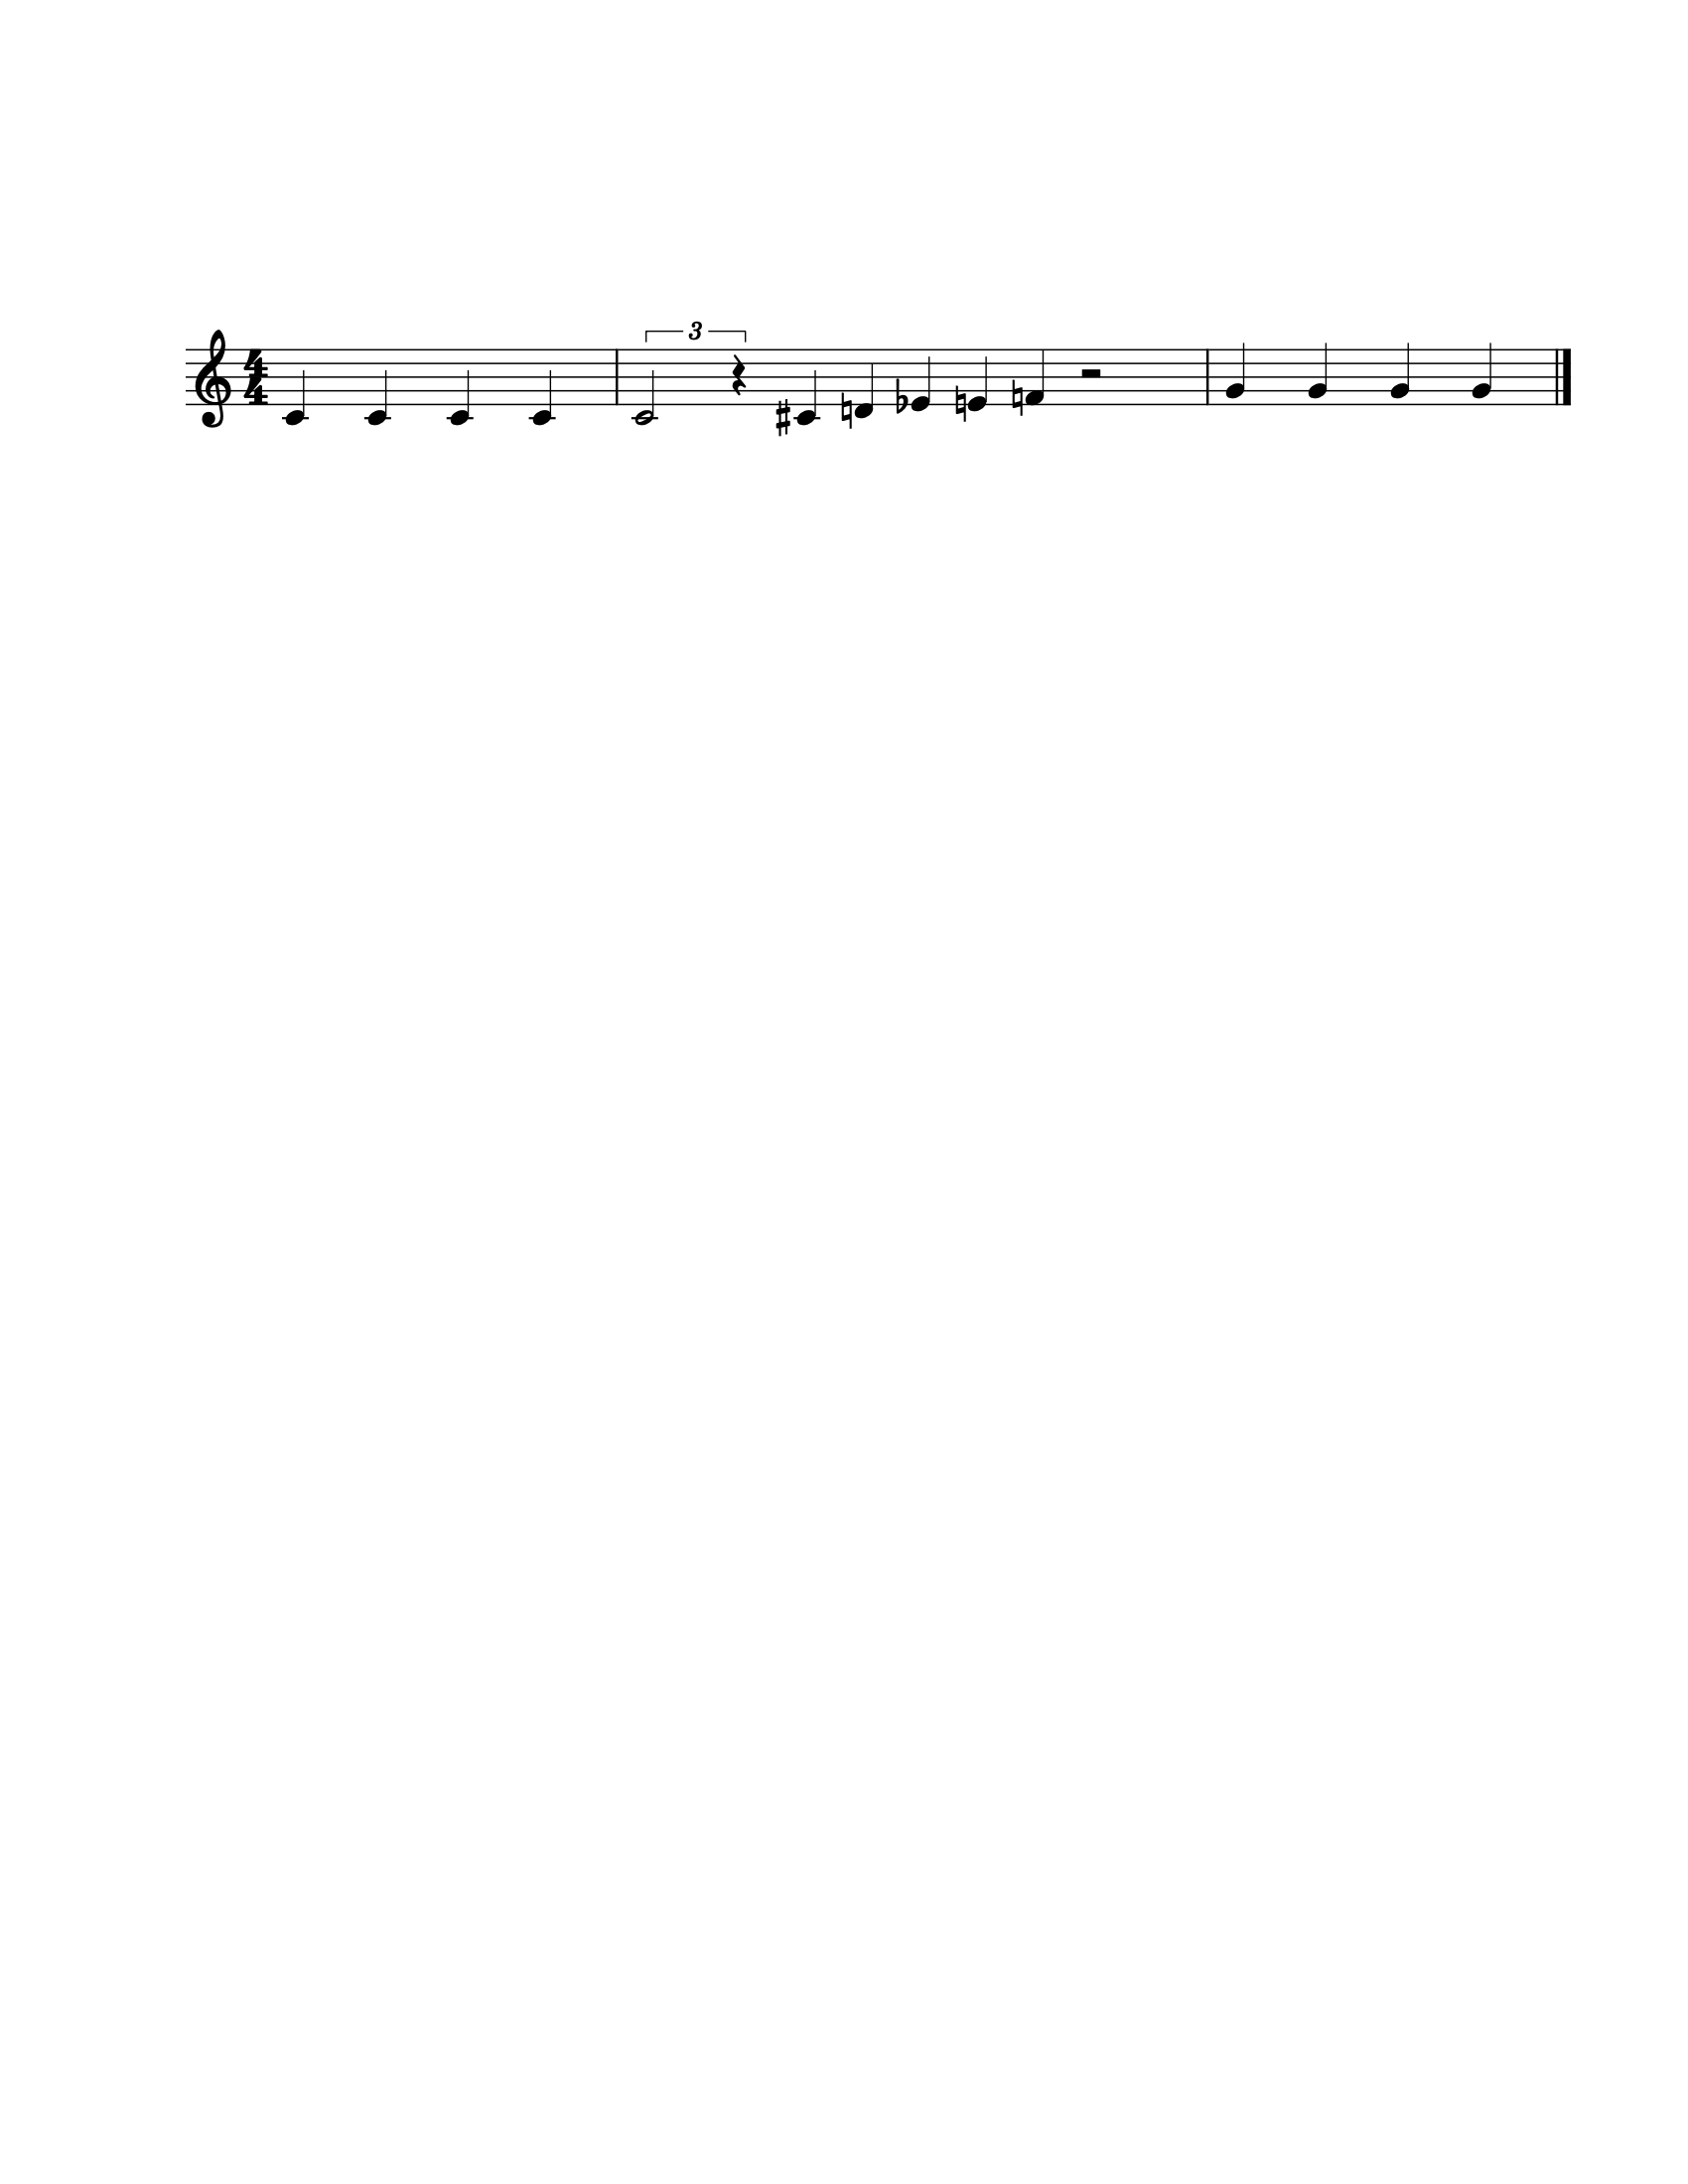

In [17]:
import copy
s = stream.Stream()
s.repeatAppend(note.Note(), 4)

t32h = duration.Tuplet(3, 2, 'half')
t54q = duration.Tuplet(5, 4, 'quarter')
n1 = note.Note()
n1.duration.type = 'half'
n1.duration.appendTuplet(copy.deepcopy(t32h))
s.append(n1)
for i in range(5):
    n = note.Note(61 + i)
    n.duration.type = 'quarter'
    n.duration.appendTuplet(copy.deepcopy(t32h))
    n.duration.appendTuplet(copy.deepcopy(t54q))
    s.append(n)
s.notes[4].duration.tuplets[0].type = 'start'
s.notes[5].duration.tuplets[1].type = 'start'
s.notes[-1].duration.tuplets[0].type = 'stop'
s.notes[-1].duration.tuplets[1].type = 'stop'
s.repeatAppend(note.Note('G4'), 4)
s.show()
s.show('midi')


In [18]:
d = duration.Duration('half')
d.appendTuplet(duration.Tuplet(3, 2))
d.appendTuplet(duration.Tuplet(7, 5))
d.aggregateTupletMultiplier()

Fraction(10, 21)

In [21]:
d = duration.Duration(3.0)
print((d.type, d.dots, d.tuplets, d.quarterLength))
d.quarterLength *= 4/5
print((d.type, d.dots, d.tuplets, d.quarterLength))
d.type = '16th'
d.dots = 2
(d.type, d.dots, d.tuplets, d.quarterLength)

('half', 1, (), 3.0)
('half', 1, (<music21.duration.Tuplet 5/4/half>,), Fraction(12, 5))


('16th', 2, (<music21.duration.Tuplet 5/4/half>,), Fraction(7, 20))

In [22]:
d = duration.Duration()
d.type = 'half'
d.dots = 1
(d.type, d.dots, d.quarterLength)

('half', 1, 3.0)

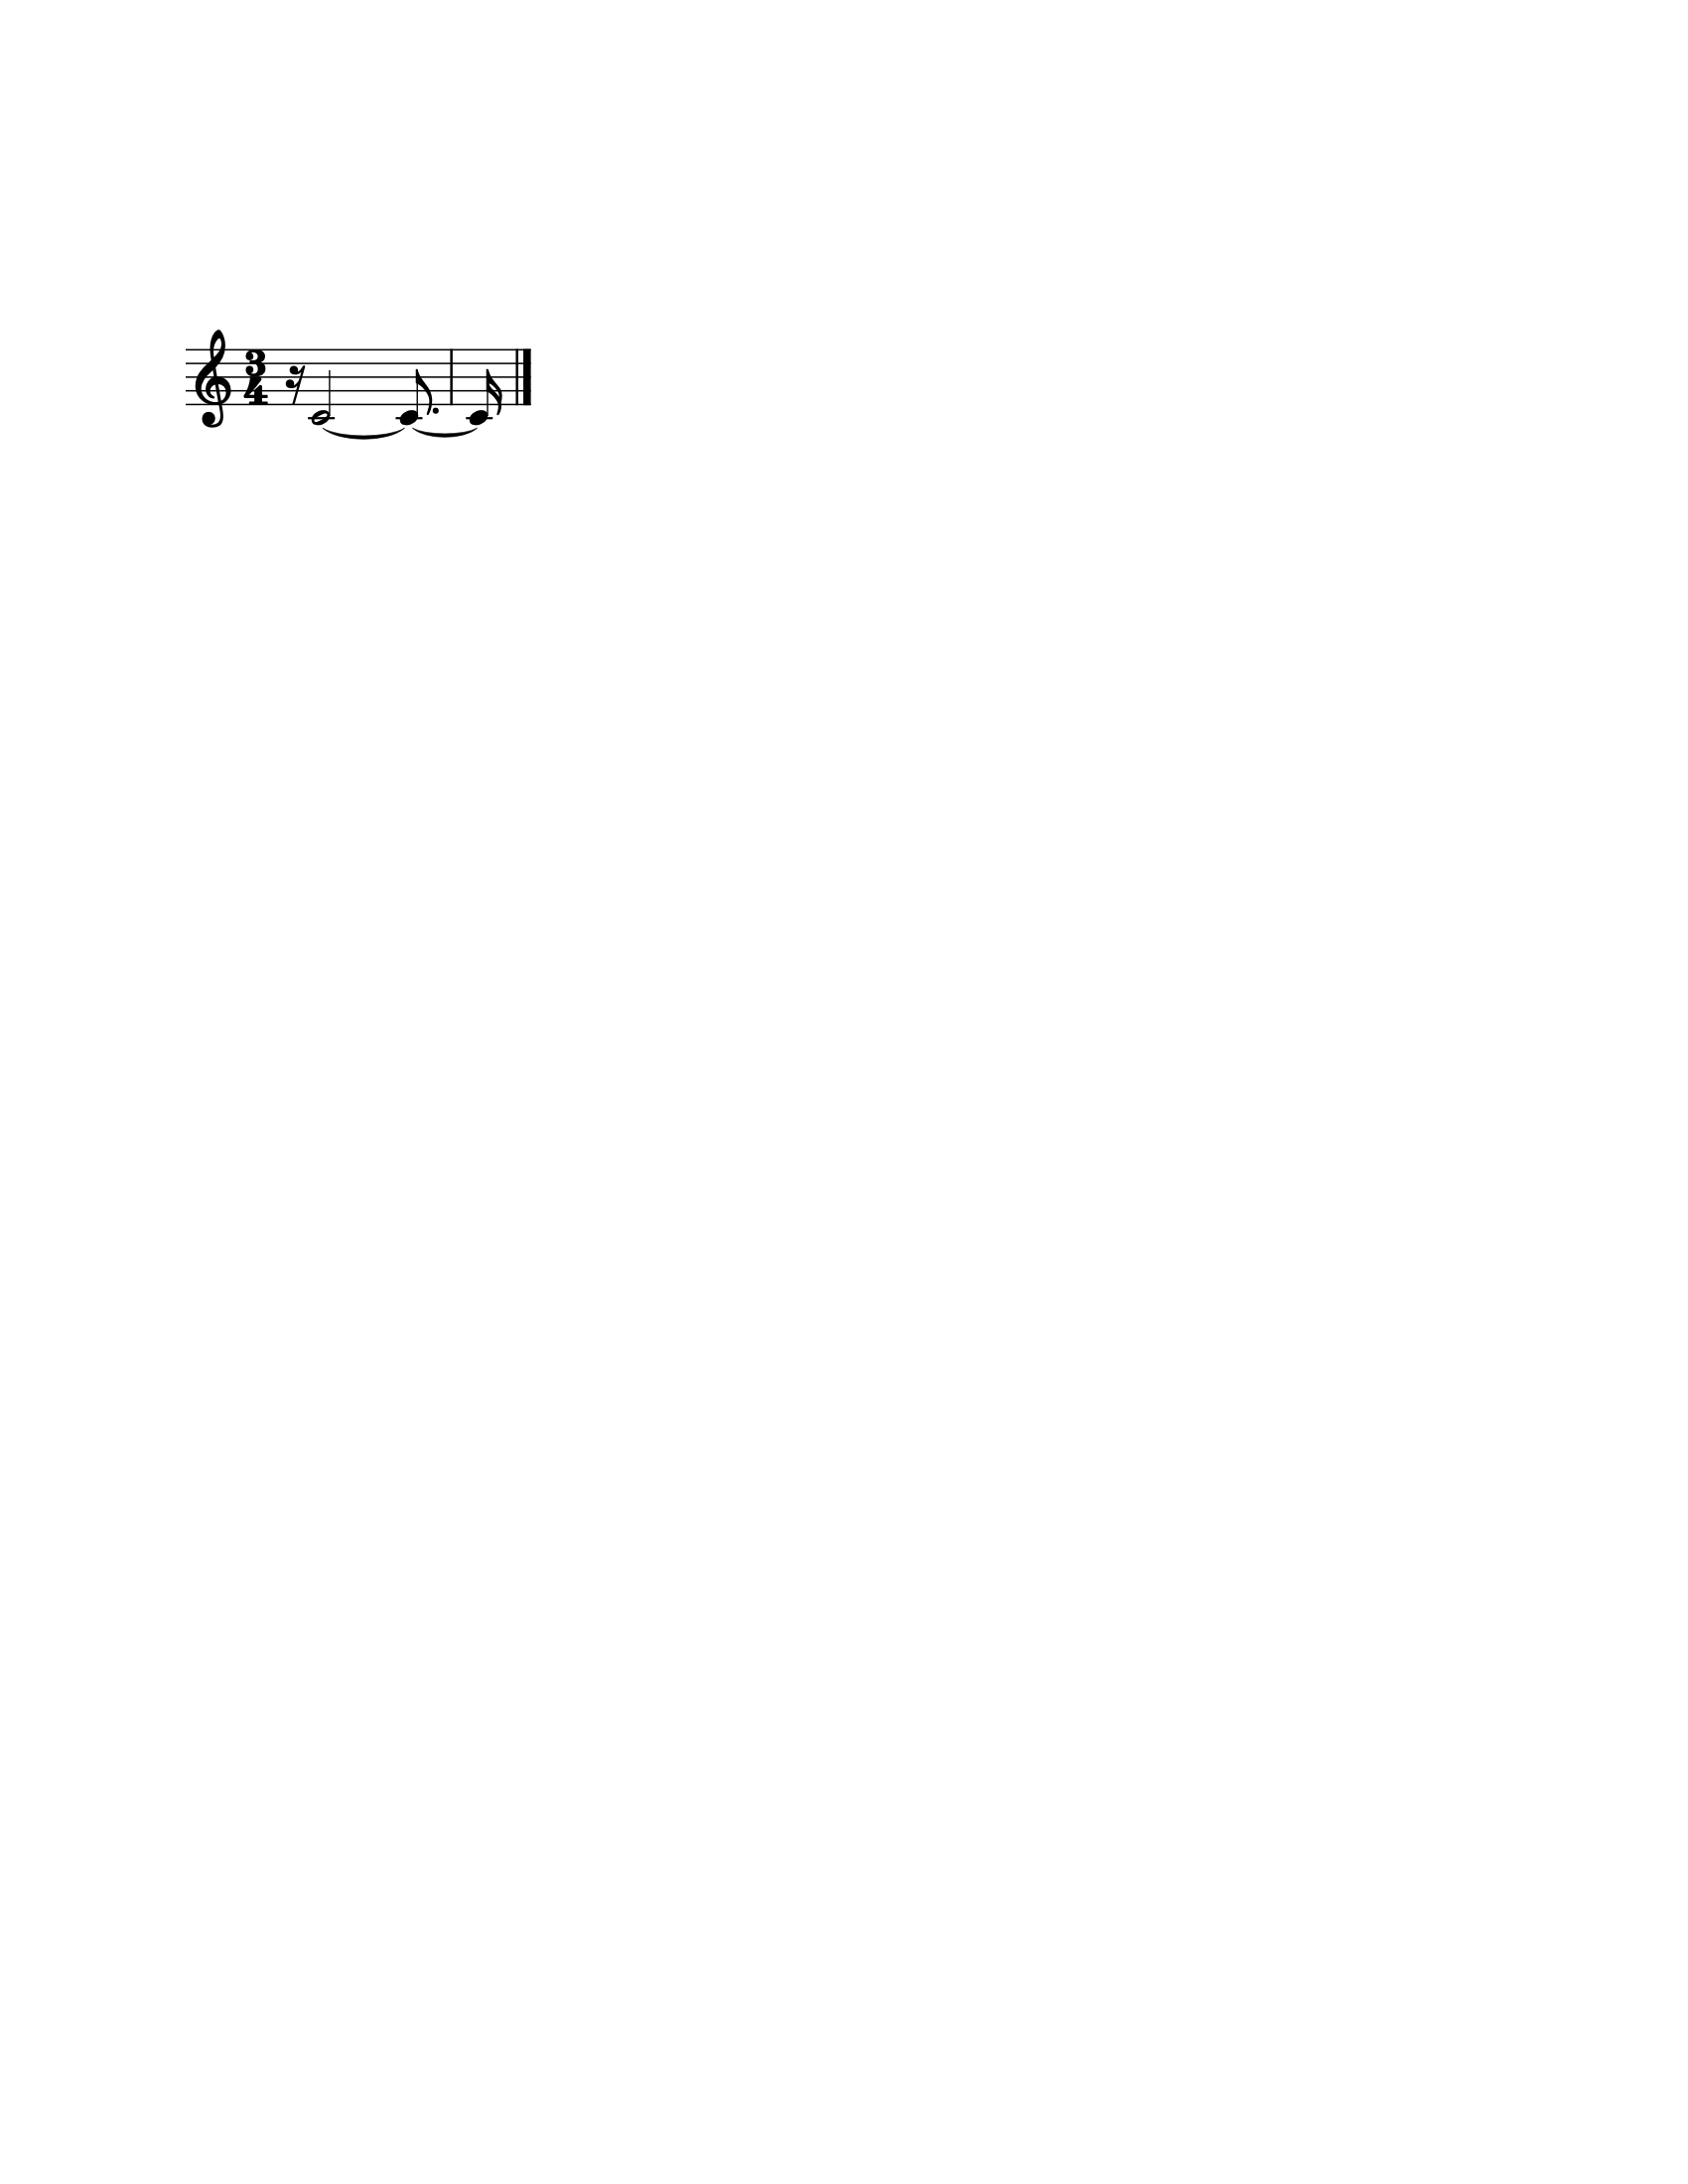

In [23]:
r = note.Rest(type='16th')
n = note.Note()
n.duration = d
s = stream.Stream([meter.TimeSignature('3/4'), r, n])
s.show()

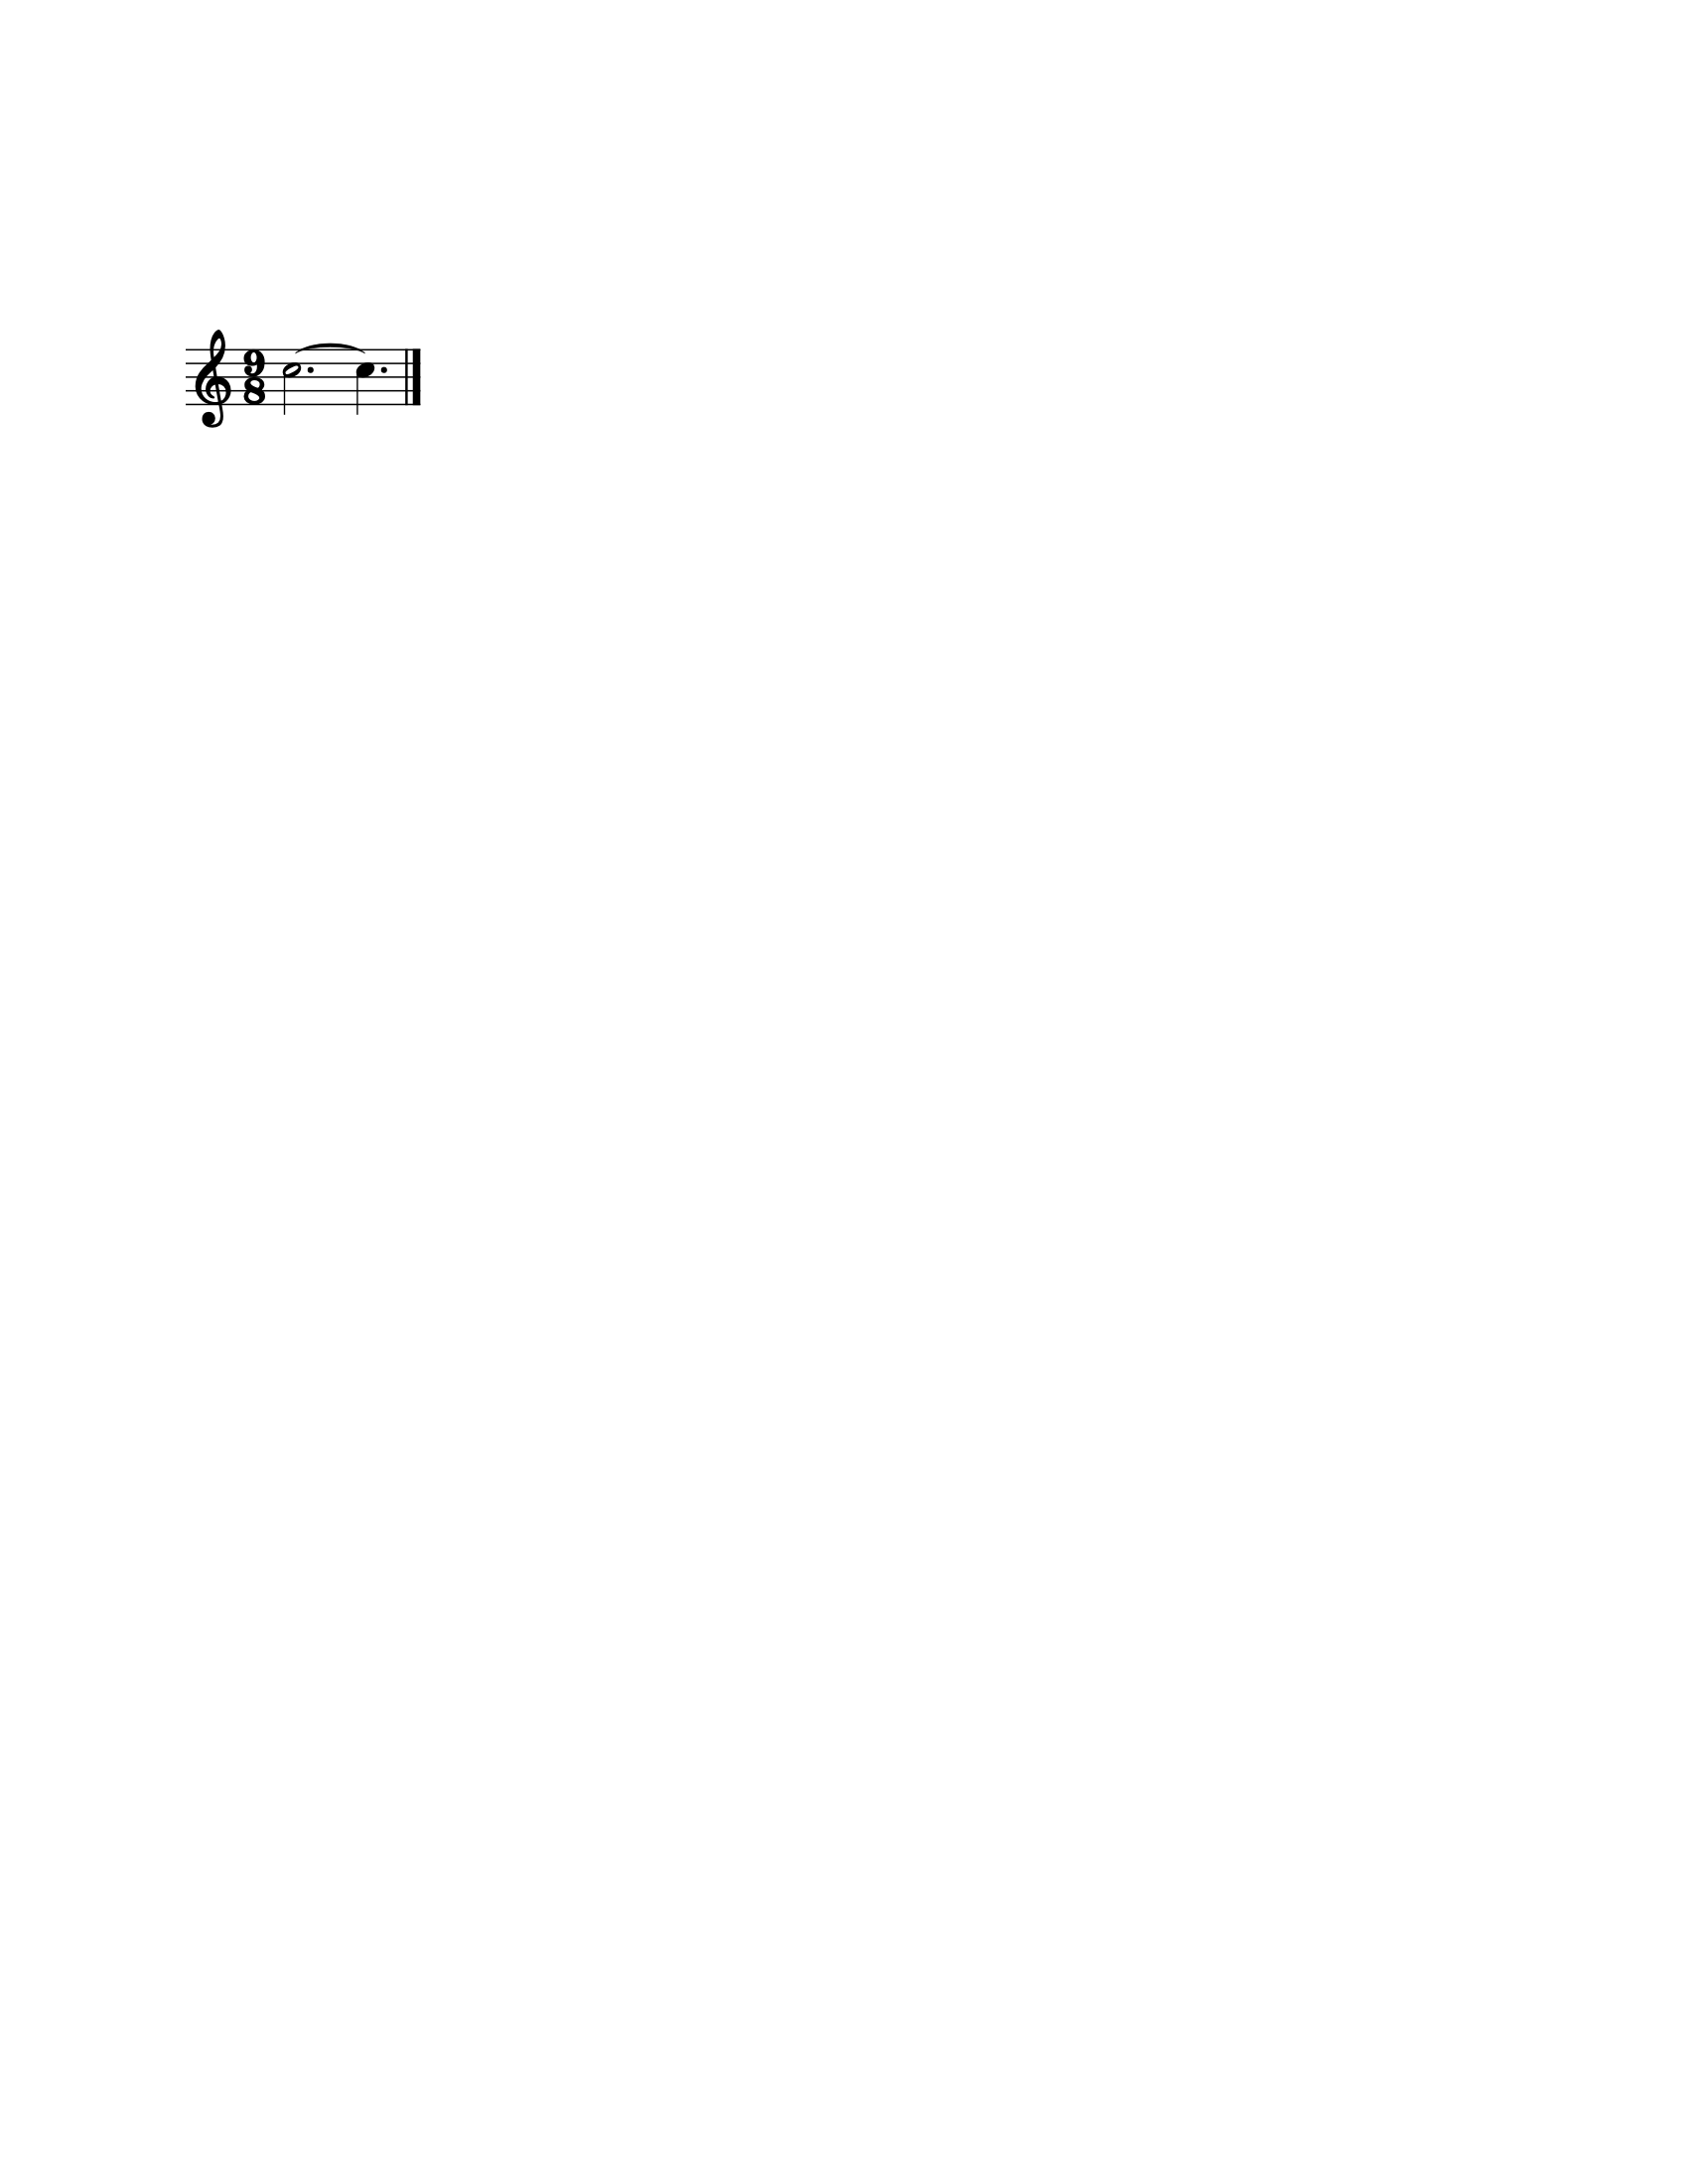

In [24]:
n = note.Note('C5', type='half')
n.duration.dotGroups = (1, 1)
n.show()

In [25]:
k = key.KeySignature(3)
k.duration

<music21.duration.Duration 0.0>

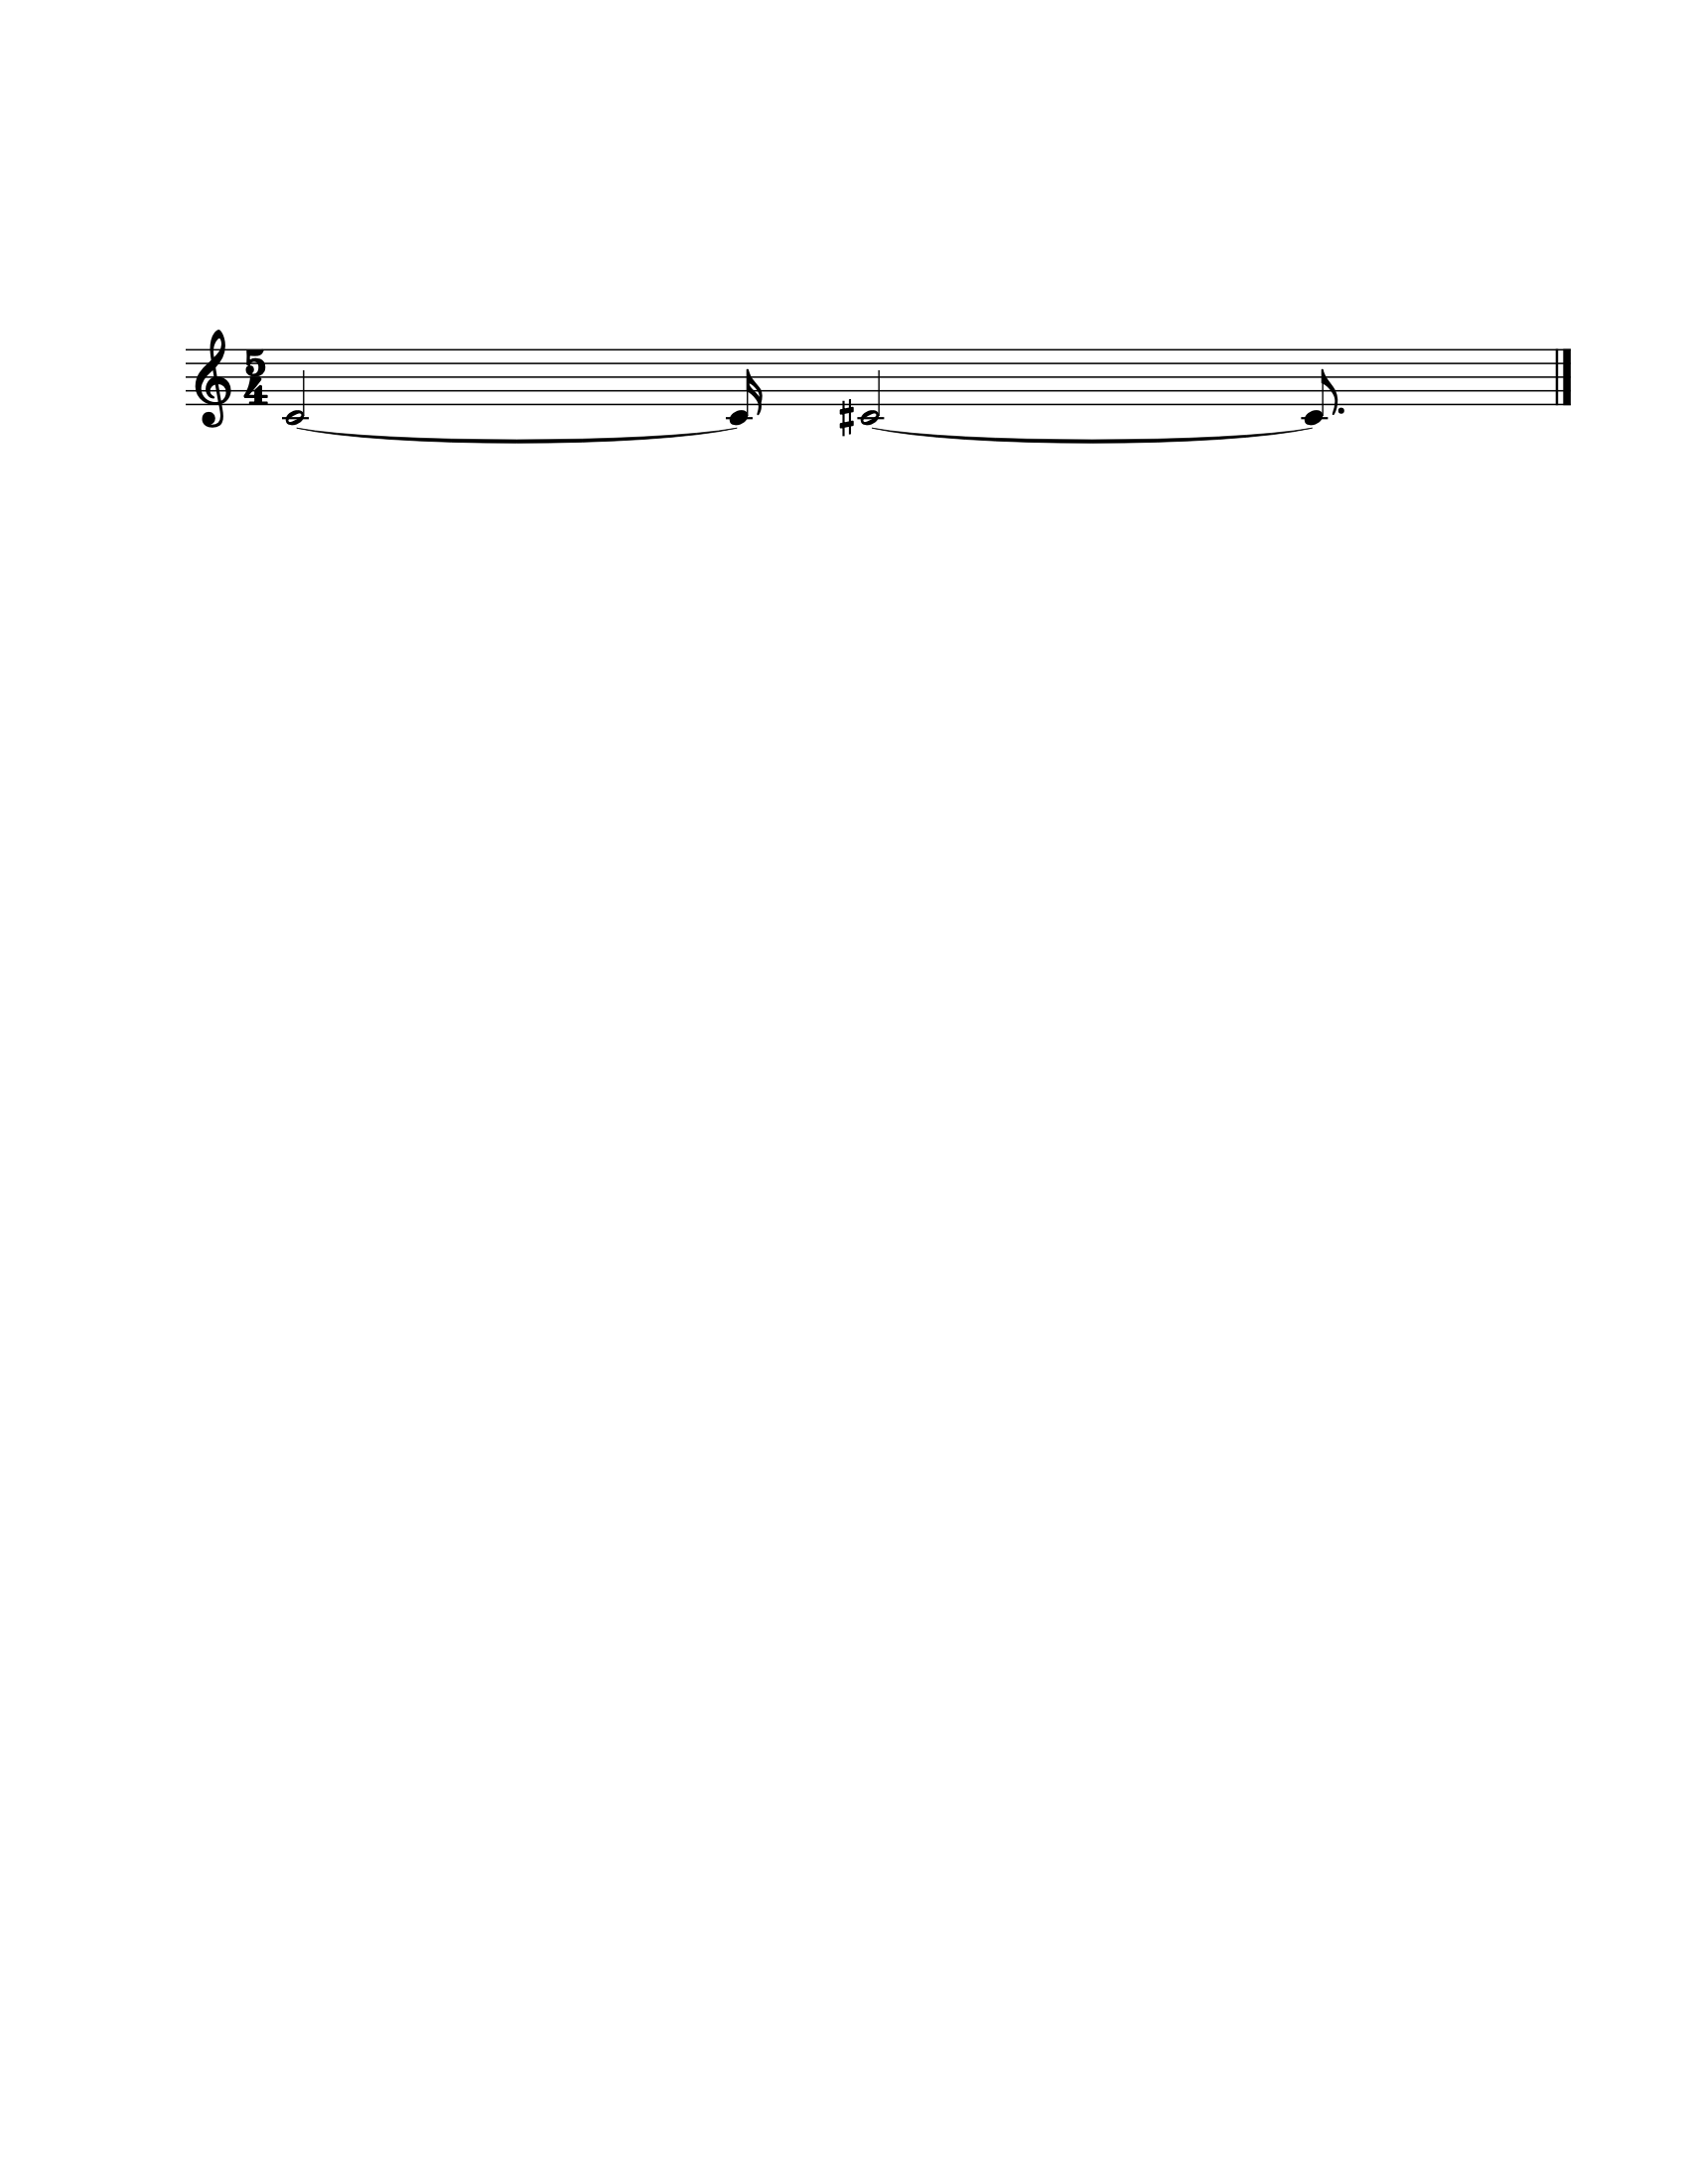

In [27]:
s = stream.Stream()
s.append(meter.TimeSignature('5/4'))
s.append(note.Note('C4', quarterLength=2.25))
s.append(note.Note('C#4', quarterLength=2.75))
s.show('midi')
s.show()


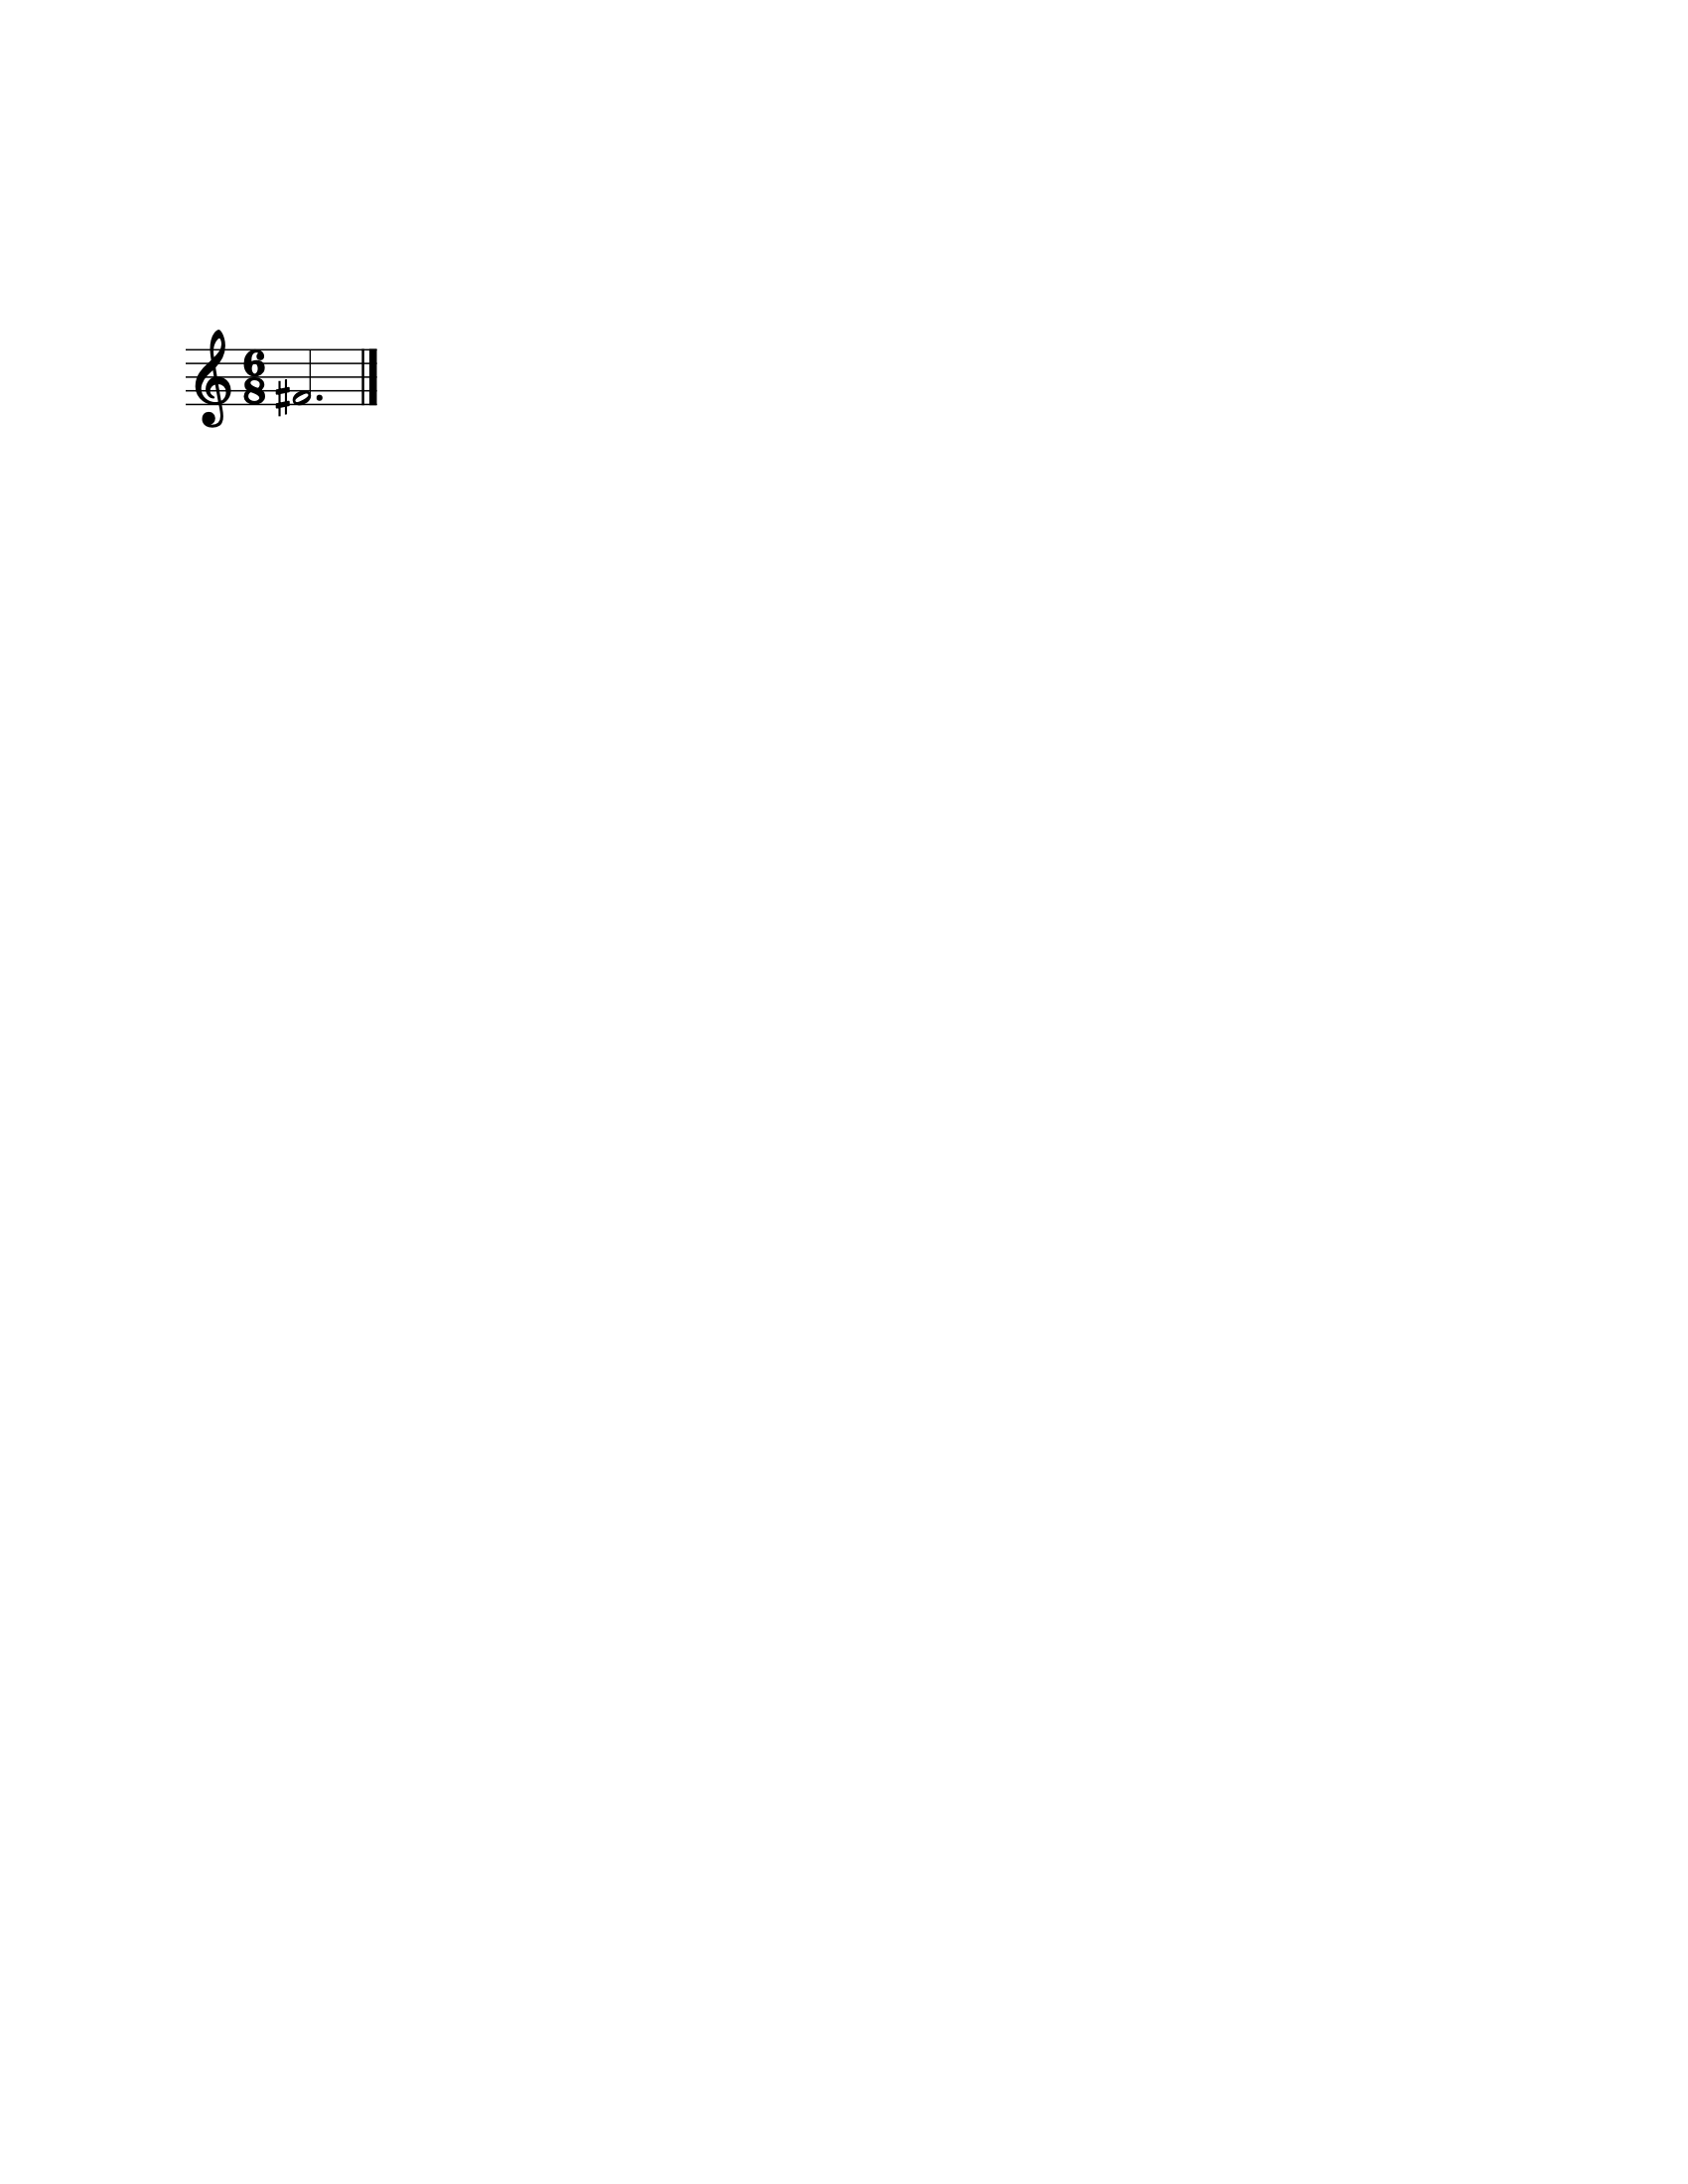

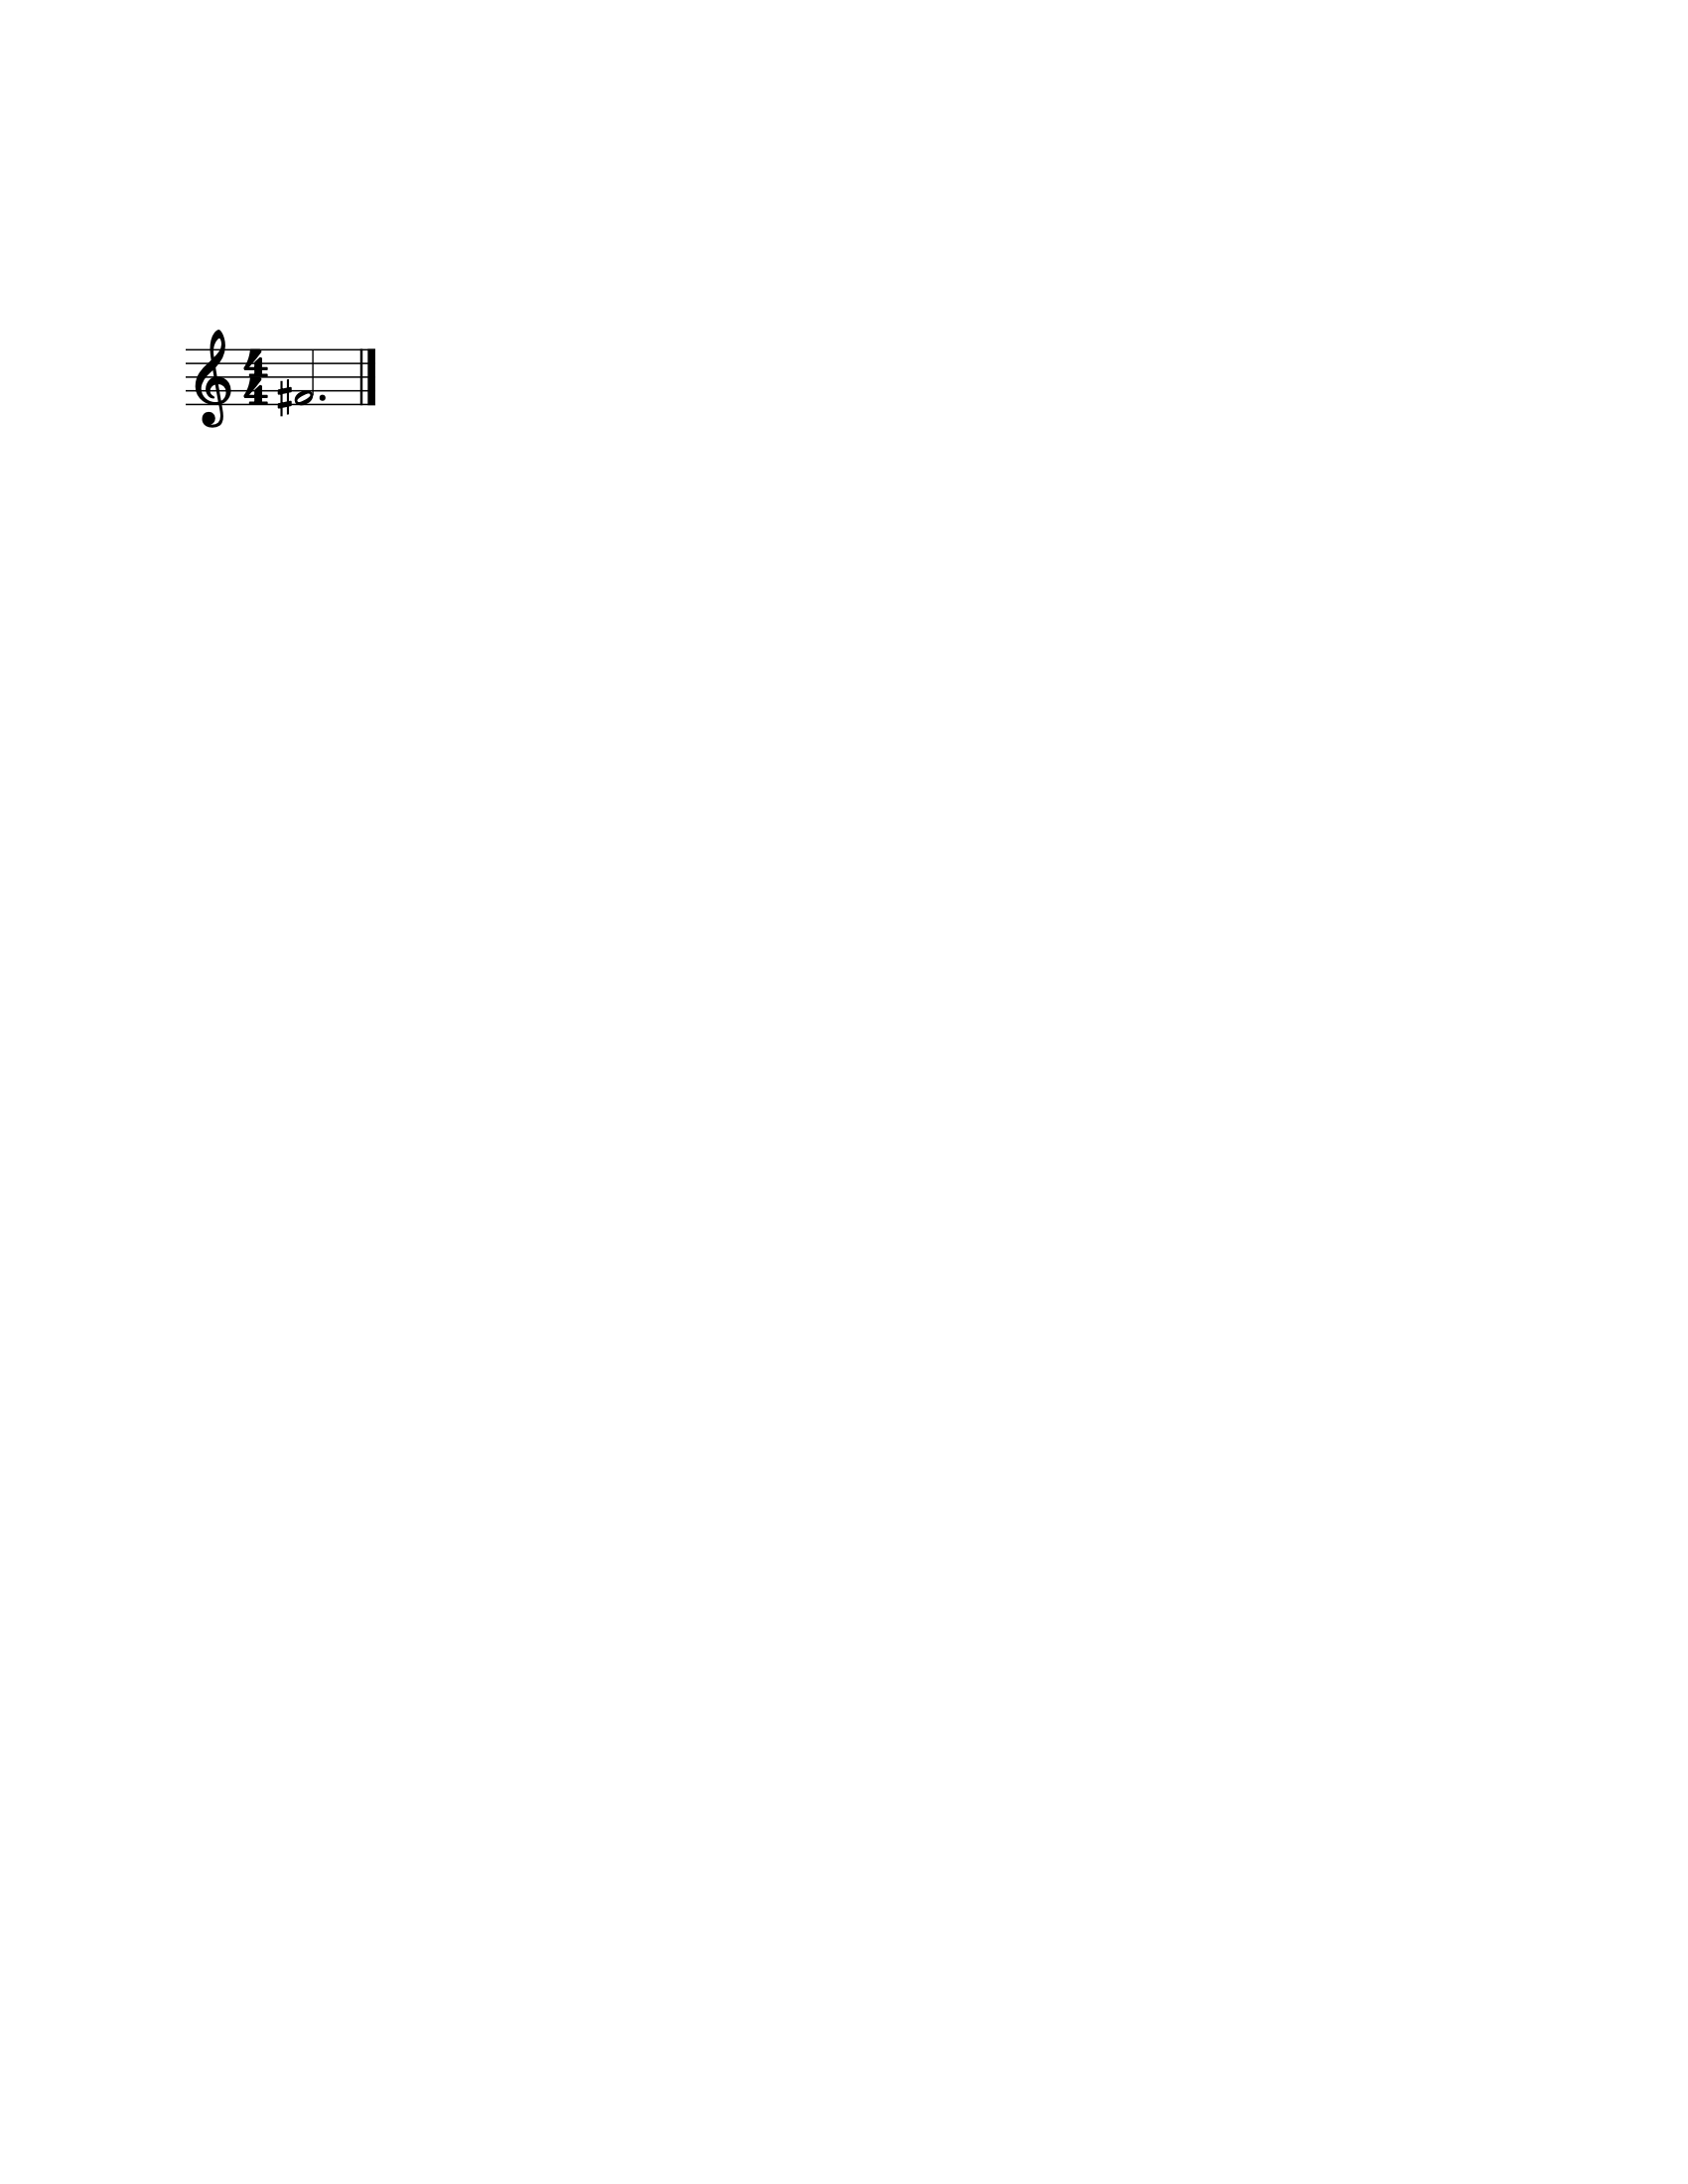

In [28]:
n = note.Note('F#4')
n.duration = d
n.show()
split = n.splitAtDurations()
split
[subNote.quarterLength for subNote in split]
s = stream.Stream()
s.append(split)
s.show()
